In [18]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/train.csv')

In [4]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
df['Male'] = df['Gender'].apply(lambda x: True if x == 'Male' else False)
df = df.drop(['Gender', 'id'], axis=1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: True if x == 'Yes' else False)
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 2 if x == '> 2 Years' else 1.5 if x=='1-2 Year' else 1)

In [6]:
df

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male
0,44,1,28.0,0,2.0,True,40454.0,26.0,217,1,True
1,76,1,3.0,0,1.5,False,33536.0,26.0,183,0,True
2,47,1,28.0,0,2.0,True,38294.0,26.0,27,1,True
3,21,1,11.0,1,1.0,False,28619.0,152.0,203,0,True
4,29,1,41.0,1,1.0,False,27496.0,152.0,39,0,False
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1.5,False,30170.0,26.0,88,0,True
381105,30,1,37.0,1,1.0,False,40016.0,152.0,131,0,True
381106,21,1,30.0,1,1.0,False,35118.0,160.0,161,0,True
381107,68,1,14.0,0,2.0,True,44617.0,124.0,74,0,False


In [7]:
train = df.iloc[:round((len(df)/10*9))]
test = df.iloc[:round((len(df)/10))]

In [8]:
features = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Annual_Premium', 'Vintage', 'Male']
X_train = train[features]
X_train

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Vintage,Male
0,44,1,28.0,0,2.0,40454.0,217,True
1,76,1,3.0,0,1.5,33536.0,183,True
2,47,1,28.0,0,2.0,38294.0,27,True
3,21,1,11.0,1,1.0,28619.0,203,True
4,29,1,41.0,1,1.0,27496.0,39,False
...,...,...,...,...,...,...,...,...
342993,67,1,28.0,1,1.5,39962.0,154,True
342994,22,1,13.0,1,1.0,24967.0,69,True
342995,30,1,47.0,0,1.5,2630.0,83,True
342996,65,1,28.0,0,2.0,50508.0,214,True


In [9]:
y_train = train['Response']
y_train

0         1
1         0
2         1
3         0
4         0
         ..
342993    0
342994    0
342995    0
342996    1
342997    0
Name: Response, Length: 342998, dtype: int64

In [10]:
X_test = test[features]
y_test = test['Response']

In [20]:
dt = tree.DecisionTreeClassifier(min_samples_leaf=2)
dt

DecisionTreeClassifier(min_samples_leaf=2)

In [21]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2)

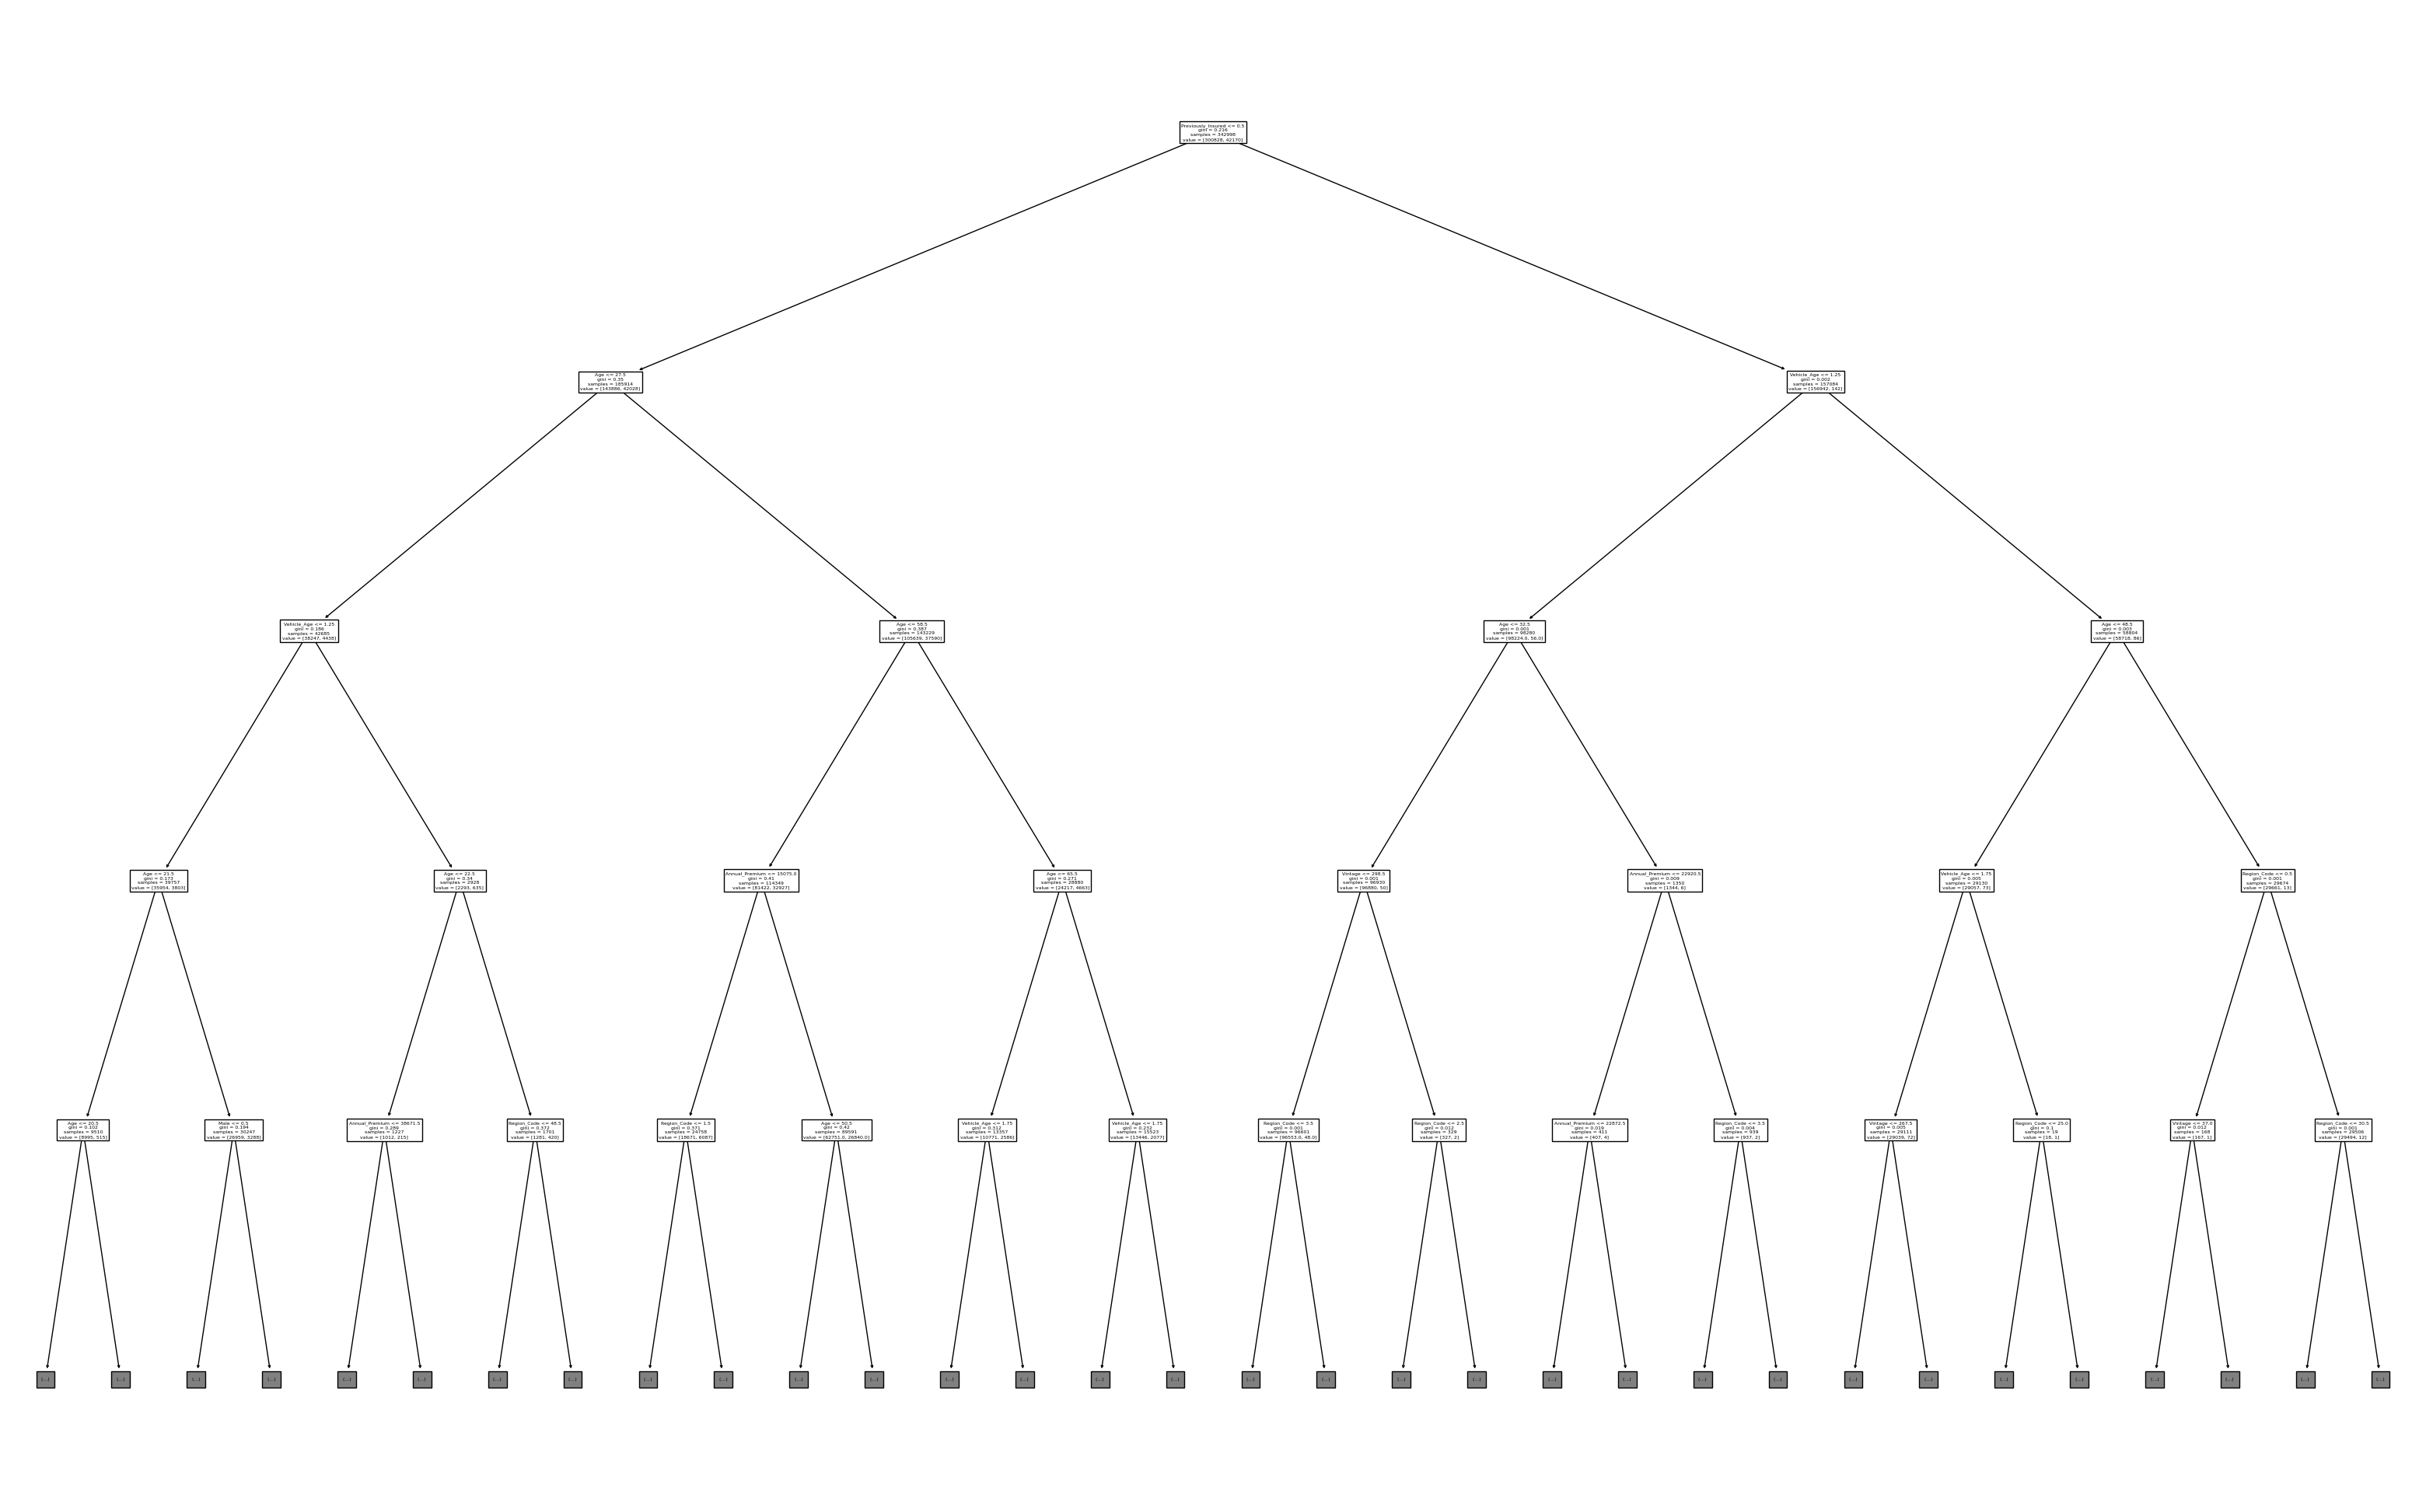

In [25]:
plt.figure(figsize=(40,25))
data = tree.plot_tree(dt,feature_names=features,max_depth=4)
plt.show()

In [26]:
dt.feature_importances_

array([1.44700790e-01, 1.62964409e-04, 7.86485933e-02, 1.49931848e-01,
       8.86707368e-03, 3.04163601e-01, 2.87572757e-01, 2.59523725e-02])

In [15]:
features

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Annual_Premium',
 'Vintage',
 'Male']

In [31]:
feature_importance = pd.DataFrame([features, list(dt.feature_importances_)])
feature_importance.transpose().sort_values(1, ascending=False)

,0,1
5,Annual_Premium,0.304164
6,Vintage,0.287573
3,Previously_Insured,0.149932
0,Age,0.144701
2,Region_Code,0.078649
7,Male,0.025952
4,Vehicle_Age,0.008867
1,Driving_License,0.000163


In [16]:
dt.score(X_test,y_test)

0.8783028521949043

In [17]:
len(df[df['Response'] == 1])/len(df)

0.12256336113815208